# Importing Libraries and Loading the file

In [16]:
import numpy as np
import pandas as pd

In [17]:
# Load the file
file_path = 'Unemployment Rate.xlsx'
data = pd.read_excel(file_path)

# Data Analysis and Preprocessing

In [18]:
# Clean the data by selecting relevant columns
cleaned_data = data[['Observation Date', 'Unemployment Rate']]

# Convert the 'Observation Date' column to datetime format using .loc to avoid the warning
cleaned_data.loc[:, 'Observation Date'] = pd.to_datetime(cleaned_data['Observation Date'])

# Set the 'Observation Date' column as the index
cleaned_data.set_index('Observation Date', inplace=True)

In [19]:
# Check for missing data
missing_data = cleaned_data.isnull().sum()

# Display the missing data information
missing_data.head()

Unemployment Rate    0
dtype: int64

In [20]:
# Perform basic analysis: Summary statistics and plot
summary_stats = cleaned_data.describe()

In [21]:
summary_stats

,Unemployment Rate
count,799.000000
mean,7517.214518
std,6897.432968
min,391.800000
25%,1393.600000
50%,5357.400000
75%,12185.450000
max,26200.200000


# Data Plotting

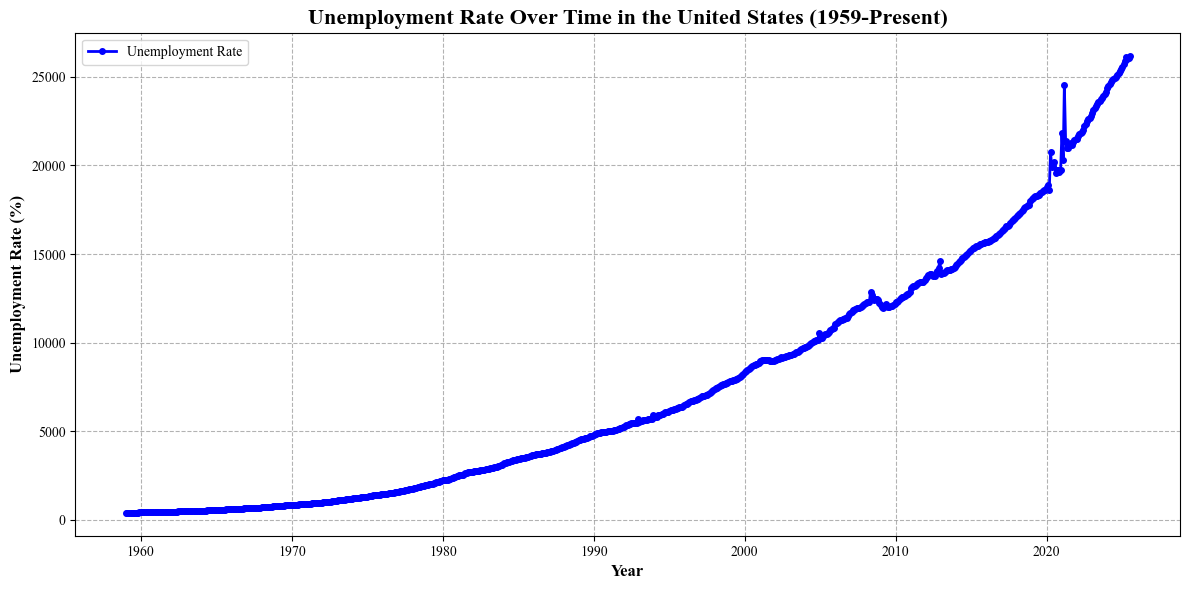

In [22]:
import matplotlib.pyplot as plt
from matplotlib import font_manager

# Plot the unemployment rate over time with professional styling
plt.figure(figsize=(12, 6))

# Plot with a line and markers for better visibility
plt.plot(cleaned_data.index, cleaned_data['Unemployment Rate'], label='Unemployment Rate', color='b', marker='o', markersize=4, linestyle='-', linewidth=2)

# Add title 
plt.title('Unemployment Rate Over Time in the United States (1959-Present)', fontsize=16, fontweight='bold', family='Times New Roman')

# Add labels 
plt.xlabel('Year', fontsize=12, fontweight='bold', family='Times New Roman')
plt.ylabel('Unemployment Rate (%)', fontsize=12, fontweight='bold', family='Times New Roman')

# Add grid 
plt.grid(True, linestyle='--', color='gray', alpha=0.6)

# Customize tick marks and labels 
plt.xticks(fontsize=10, family='Times New Roman')
plt.yticks(fontsize=10, family='Times New Roman')

# Adding a legend 
plt.legend(loc='upper left', fontsize=10, prop={'family': 'Times New Roman'})

# Make layout tight to avoid overlapping
plt.tight_layout()

# Show the plot
plt.show()

# Stochastic Properties and Pre-testing

# ACF, PACF, and ADF Test

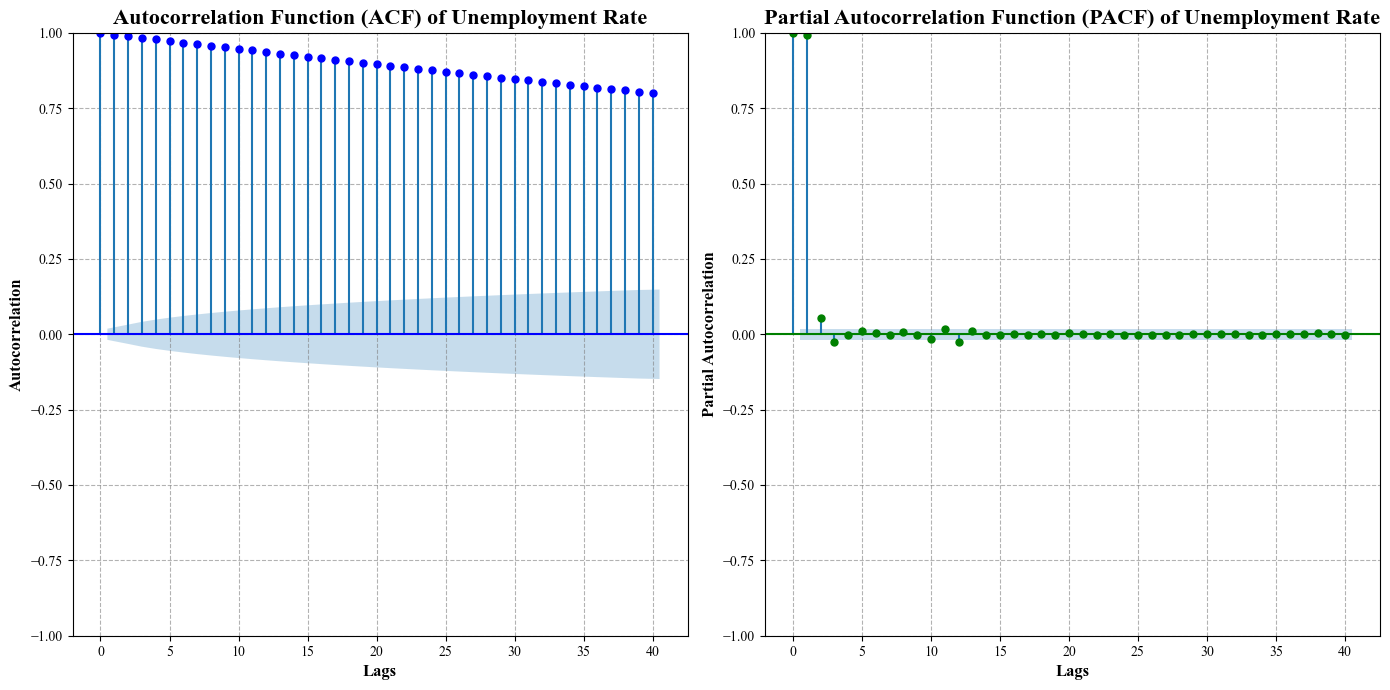

In [23]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from matplotlib import rcParams

rcParams['font.family'] = 'Times New Roman'

# Plot ACF and PACF 
plt.figure(figsize=(14, 7))

# Plot ACF
plt.subplot(121)
plot_acf(cleaned_data['Unemployment Rate'], lags=40, ax=plt.gca(), color='b', alpha=0.6)
plt.title('Autocorrelation Function (ACF) of Unemployment Rate', fontsize=16, fontweight='bold')
plt.xlabel('Lags', fontsize=12, fontweight='bold')
plt.ylabel('Autocorrelation', fontsize=12, fontweight='bold')
plt.grid(True, linestyle='--', color='gray', alpha=0.6)

# Plot PACF
plt.subplot(122)
plot_pacf(cleaned_data['Unemployment Rate'], lags=40, ax=plt.gca(), color='g', alpha=0.6)
plt.title('Partial Autocorrelation Function (PACF) of Unemployment Rate', fontsize=16, fontweight='bold')
plt.xlabel('Lags', fontsize=12, fontweight='bold')
plt.ylabel('Partial Autocorrelation', fontsize=12, fontweight='bold')
plt.grid(True, linestyle='--', color='gray', alpha=0.6)

plt.tight_layout()
plt.show()

In [24]:
from statsmodels.tsa.stattools import adfuller
df_cleaned = cleaned_data

# Perform the Augmented Dickey-Fuller test on the 'Unemployment Rate' series
adf_result = adfuller(df_cleaned['Unemployment Rate'])

# Extract the ADF results
adf_statistic = adf_result[0]
adf_p_value = adf_result[1]
adf_critical_values = adf_result[4]

# Display the ADF result 
print("Augmented Dickey-Fuller Test Results")
print("-" * 50)
print(f"ADF Statistic: {adf_statistic:.4f}")
print(f"P-value: {adf_p_value:.4f}")
print("\nCritical Values:")
for key, value in adf_critical_values.items():
    print(f"  {key}: {value:.4f}")
print("-" * 50)

# Interpret the result
if adf_p_value < 0.05:
    print("Conclusion: The series is likely stationary (reject the null hypothesis).")
else:
    print("Conclusion: The series is likely non-stationary (fail to reject the null hypothesis).")


Augmented Dickey-Fuller Test Results
--------------------------------------------------
ADF Statistic: 5.6724
P-value: 1.0000

Critical Values:
  1%: -3.4388
  5%: -2.8653
  10%: -2.5688
--------------------------------------------------
Conclusion: The series is likely non-stationary (fail to reject the null hypothesis).


# Differencing

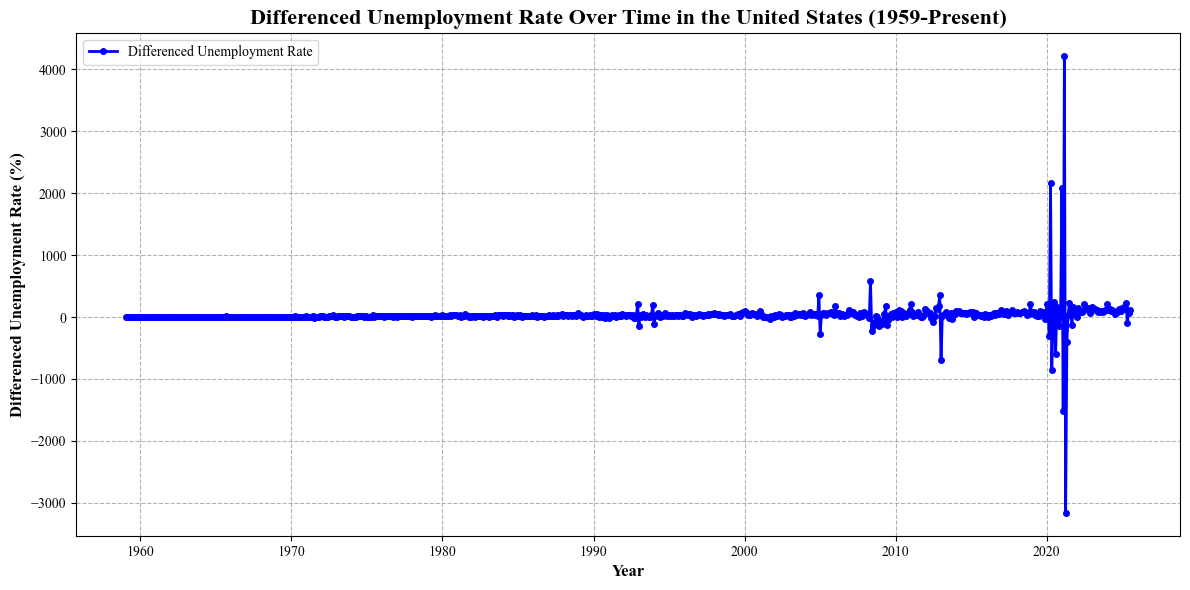

Augmented Dickey-Fuller Test Results for Differenced Data
--------------------------------------------------
ADF Statistic: -3.4400
P-value: 0.0097

Critical Values:
  1%: -3.4387
  5%: -2.8652
  10%: -2.5687
--------------------------------------------------
Conclusion: The differenced series is likely stationary (reject the null hypothesis).


In [25]:
# Apply differencing to make the data stationary
df_cleaned['Unemployment Rate Diff'] = df_cleaned['Unemployment Rate'].diff()

# Drop the first row since it will be NaN due to the differencing
df_cleaned.dropna(inplace=True)

# Check the result
plt.figure(figsize=(12, 6))

# Plot the differenced series
plt.plot(df_cleaned.index, df_cleaned['Unemployment Rate Diff'], label='Differenced Unemployment Rate', color='b', marker='o', markersize=4, linestyle='-', linewidth=2)

# Add title 
plt.title('Differenced Unemployment Rate Over Time in the United States (1959-Present)', fontsize=16, fontweight='bold', family='Times New Roman')

# Add labels 
plt.xlabel('Year', fontsize=12, fontweight='bold', family='Times New Roman')
plt.ylabel('Differenced Unemployment Rate (%)', fontsize=12, fontweight='bold', family='Times New Roman')

# Add grid 
plt.grid(True, linestyle='--', color='gray', alpha=0.6)

# Customize tick marks and labels 
plt.xticks(fontsize=10, family='Times New Roman')
plt.yticks(fontsize=10, family='Times New Roman')

# Adding a legend 
plt.legend(loc='upper left', fontsize=10, prop={'family': 'Times New Roman'})

# Make layout tight to avoid overlapping
plt.tight_layout()

# Show the plot
plt.show()

# Re-run the Augmented Dickey-Fuller test to check if the differenced series is stationary
adf_result_diff = adfuller(df_cleaned['Unemployment Rate Diff'])

# Extract the ADF results
adf_statistic_diff = adf_result_diff[0]
adf_p_value_diff = adf_result_diff[1]
adf_critical_values_diff = adf_result_diff[4]

# Display the ADF result for differenced data
print("Augmented Dickey-Fuller Test Results for Differenced Data")
print("-" * 50)
print(f"ADF Statistic: {adf_statistic_diff:.4f}")
print(f"P-value: {adf_p_value_diff:.4f}")
print("\nCritical Values:")
for key, value in adf_critical_values_diff.items():
    print(f"  {key}: {value:.4f}")
print("-" * 50)

# Interpret the result
if adf_p_value_diff < 0.05:
    print("Conclusion: The differenced series is likely stationary (reject the null hypothesis).")
else:
    print("Conclusion: The differenced series is likely non-stationary (fail to reject the null hypothesis).")


# Find Optimal AR Lag Using AIC and BIC

AIC and BIC Values for Different Lags
--------------------------------------------------
Lag 1: AIC = 10945.8857, BIC = 10959.9283
Lag 2: AIC = 10608.0325, BIC = 10626.7509
Lag 3: AIC = 10587.8748, BIC = 10611.2665
Lag 4: AIC = 10577.5666, BIC = 10605.6291
Lag 5: AIC = 10545.8128, BIC = 10578.5436
Lag 6: AIC = 10503.2344, BIC = 10540.6309
Lag 7: AIC = 10491.1787, BIC = 10533.2384
Lag 8: AIC = 10472.3512, BIC = 10519.0715
Lag 9: AIC = 10440.4775, BIC = 10491.8559
Lag 10: AIC = 10420.5907, BIC = 10476.6247
Lag 11: AIC = 10404.2324, BIC = 10464.9194
Lag 12: AIC = 10378.1196, BIC = 10443.4570
Lag 13: AIC = 10352.7295, BIC = 10422.7147
Lag 14: AIC = 10339.4920, BIC = 10414.1225
Lag 15: AIC = 10326.4300, BIC = 10405.7033
Lag 16: AIC = 10314.5668, BIC = 10398.4801
Lag 17: AIC = 10297.8847, BIC = 10386.4357
Lag 18: AIC = 10286.2752, BIC = 10379.4611
Lag 19: AIC = 10275.3128, BIC = 10373.1310
Lag 20: AIC = 10263.5268, BIC = 10365.9748
--------------------------------------------------
Optimal l

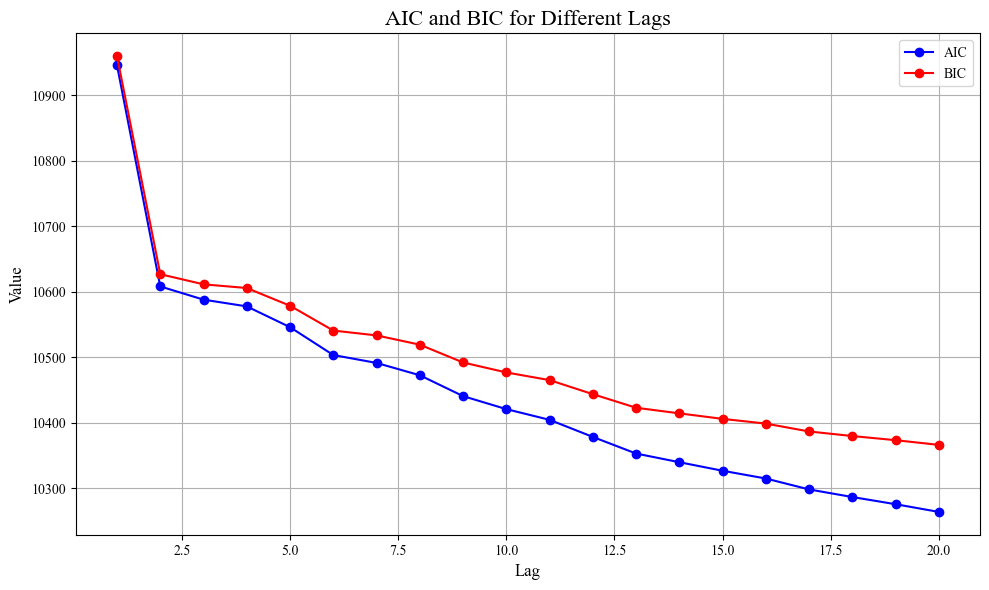

In [26]:
# Find Optimal AR Lag Using AIC and BIC
from statsmodels.tsa.ar_model import AutoReg

# Set the frequency to monthly (MS - Month Start) if data is monthly
df_cleaned = df_cleaned.asfreq('MS')

# Max lag to check
max_lag = 20  

# Store the AIC and BIC values for each lag
aic_values = []
bic_values = []
lags = list(range(1, max_lag + 1))

# Loop over different lags and fit the AR model
for lag in lags:
    model = AutoReg(df_cleaned['Unemployment Rate'], lags=lag)
    ar_model_fitted = model.fit()
    
    # Store the AIC and BIC values for each lag
    aic_values.append(ar_model_fitted.aic)
    bic_values.append(ar_model_fitted.bic)

# Find the lag with the lowest AIC and BIC
optimal_aic_lag = lags[np.argmin(aic_values)]
optimal_bic_lag = lags[np.argmin(bic_values)]

# Print AIC and BIC values for each lag
print("AIC and BIC Values for Different Lags")
print("-" * 50)
for lag, aic, bic in zip(lags, aic_values, bic_values):
    print(f"Lag {lag}: AIC = {aic:.4f}, BIC = {bic:.4f}")

# Print the optimal lags based on AIC and BIC
print("-" * 50)
print(f"Optimal lag based on AIC: {optimal_aic_lag}")
print(f"Optimal lag based on BIC: {optimal_bic_lag}")

# Plot the AIC and BIC values for each lag
plt.figure(figsize=(10, 6))
plt.plot(lags, aic_values, label='AIC', color='b', marker='o')
plt.plot(lags, bic_values, label='BIC', color='r', marker='o')
plt.xlabel('Lag', fontsize=12)
plt.ylabel('Value', fontsize=12)
plt.title('AIC and BIC for Different Lags', fontsize=16)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


AR-20 Model Summary
                            AutoReg Model Results                             
Dep. Variable:      Unemployment Rate   No. Observations:                  798
Model:                    AutoReg(20)   Log Likelihood               -5109.763
Method:               Conditional MLE   S.D. of innovations            172.239
Date:                Tue, 30 Dec 2025   AIC                          10263.527
Time:                        18:19:24   BIC                          10365.975
Sample:                    10-01-1960   HQIC                         10302.934
                         - 07-01-2025                                         
                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     7.3990      9.306      0.795      0.427     -10.841      25.639
Unemployment Rate.L1      0.3224      0.036      9.003      0.000       0.252

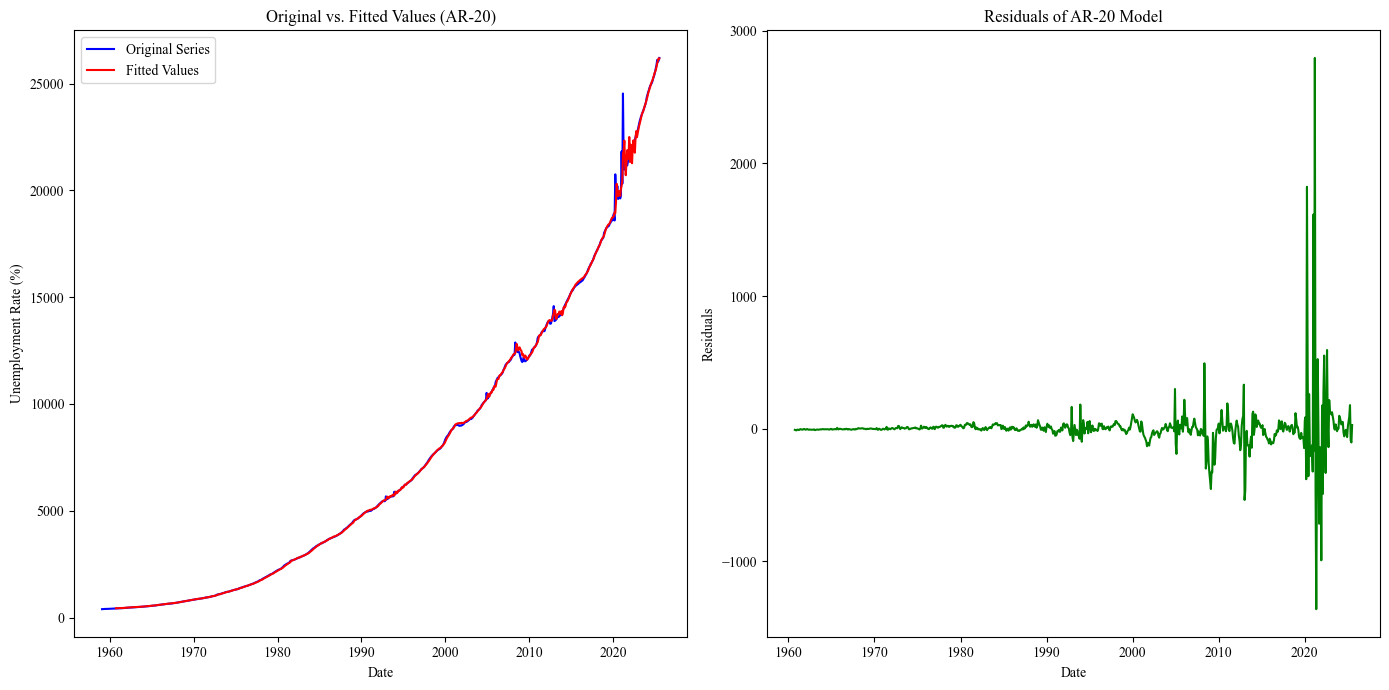

MSE (Mean Squared Error): 29666.1359
RMSE (Root Mean Squared Error): 172.2386
MAE (Mean Absolute Error): 53.6502
MAPE (Mean Absolute Percentage Error): 0.6457%


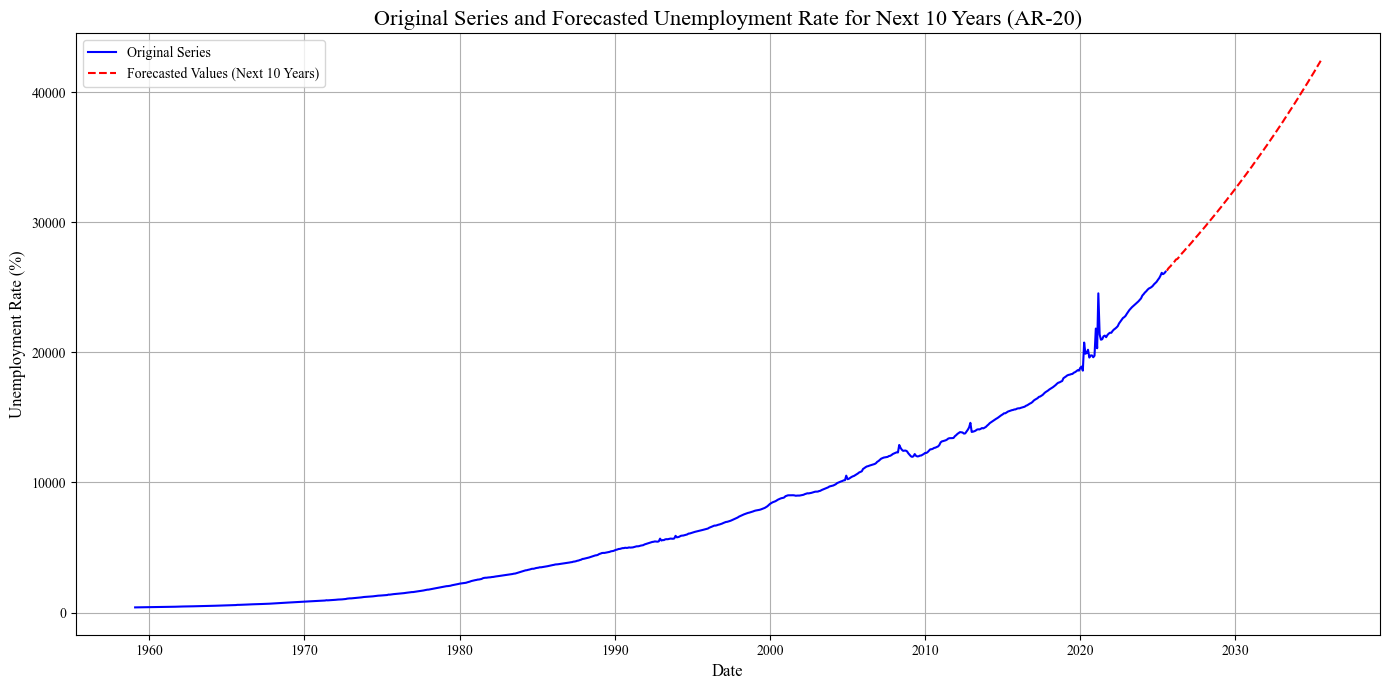

In [27]:
# Step 1: Fit the Auto-Regressive (AR) model with the optimal lag
optimal_lag = optimal_aic_lag  # Or use optimal_bic_lag if you prefer

# Fit the AR model
from statsmodels.tsa.ar_model import AutoReg
model = AutoReg(df_cleaned['Unemployment Rate'], lags=optimal_lag)
ar_model_fitted = model.fit()

# Print the AR model summary
print(f"\nAR-{optimal_lag} Model Summary")
print(ar_model_fitted.summary())

# Step 2: Calculate Fitted Values
fitted_values = ar_model_fitted.fittedvalues

# Step 3: Plot the original series and the fitted values
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 7))

# Plot the original vs. fitted values
plt.subplot(121)
plt.plot(df_cleaned.index, df_cleaned['Unemployment Rate'], label='Original Series', color='blue')
plt.plot(df_cleaned.index[optimal_lag:], fitted_values, label='Fitted Values', color='red')  # Aligning the fitted values
plt.title(f'Original vs. Fitted Values (AR-{optimal_lag})')
plt.xlabel('Date')
plt.ylabel('Unemployment Rate (%)')
plt.legend(loc='upper left')

# Plot the residuals
plt.subplot(122)
plt.plot(df_cleaned.index[optimal_lag:], ar_model_fitted.resid, color='green')  # Residuals after lag
plt.title(f'Residuals of AR-{optimal_lag} Model')
plt.xlabel('Date')
plt.ylabel('Residuals')

plt.tight_layout()
plt.show()

# Step 4: Calculate the RMSE, MSE, MAE, and MAPE
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Actual values (original data), excluding the first 'optimal_lag' data points
actual_values = df_cleaned['Unemployment Rate'][optimal_lag:]

# Calculate MSE (Mean Squared Error)
mse = mean_squared_error(actual_values, fitted_values)
print(f'MSE (Mean Squared Error): {mse:.4f}')

# Calculate RMSE (Root Mean Squared Error)
rmse_value = np.sqrt(mse)
print(f'RMSE (Root Mean Squared Error): {rmse_value:.4f}')

# Calculate MAE (Mean Absolute Error)
mae = mean_absolute_error(actual_values, fitted_values)
print(f'MAE (Mean Absolute Error): {mae:.4f}')

# Calculate MAPE (Mean Absolute Percentage Error)
mape = np.mean(np.abs((actual_values - fitted_values) / actual_values)) * 100
print(f'MAPE (Mean Absolute Percentage Error): {mape:.4f}%')

# Step 5: Forecast for the next 10 years (120 months)
forecast_steps = 120
forecast = ar_model_fitted.predict(start=len(df_cleaned), end=len(df_cleaned) + forecast_steps - 1)

# Create a new time index for the forecasted period
forecast_index = pd.date_range(df_cleaned.index[-1] + pd.Timedelta(days=1), periods=forecast_steps, freq='MS')

# Combine the original series and the forecasted values
forecast_series = pd.Series(forecast, index=forecast_index)

# Step 6: Plot the original data and the forecasted values
plt.figure(figsize=(14, 7))

# Plot original data
plt.plot(df_cleaned.index, df_cleaned['Unemployment Rate'], label='Original Series', color='blue')

# Plot forecasted data
plt.plot(forecast_series.index, forecast_series, label='Forecasted Values (Next 10 Years)', color='red', linestyle='--')

# Title and labels
plt.title(f'Original Series and Forecasted Unemployment Rate for Next 10 Years (AR-{optimal_lag})', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Unemployment Rate (%)', fontsize=12)
plt.legend()

# Show plot
plt.grid(True)
plt.tight_layout()
plt.show()


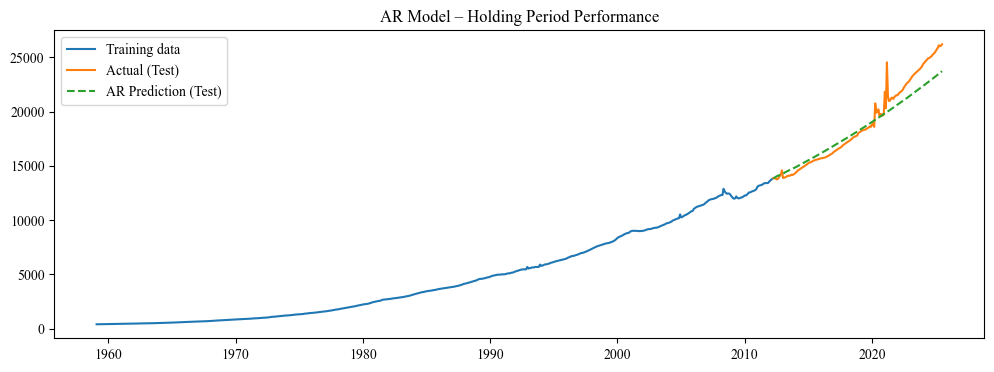

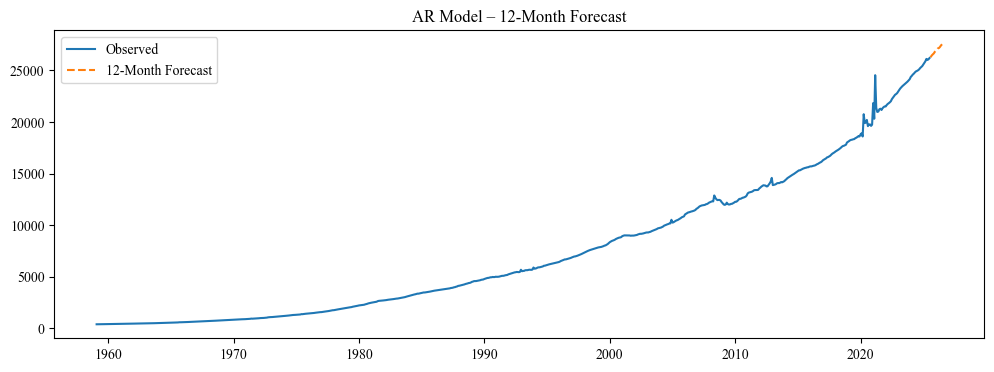

In [28]:
# Step 1: Split data into train and test sets
train_size = int(len(df_cleaned) * 0.8)  # 80% for training
train, test = df_cleaned[:train_size], df_cleaned[train_size:]

# Step 2: Fit the AR model on the training data
optimal_lag = optimal_aic_lag  # Use optimal AIC lag
ar_model = AutoReg(train['Unemployment Rate'], lags=optimal_lag)
ar_model_fitted = ar_model.fit()

# Step 3: One-step-ahead predictions for the test period
test_pred = ar_model_fitted.predict(
    start=test.index[0],
    end=test.index[-1],
    dynamic=False
)

# Step 4: Plot the training data, actual test data, and AR predictions
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 4))
plt.plot(train.index, train['Unemployment Rate'], label="Training data")
plt.plot(test.index, test['Unemployment Rate'], label="Actual (Test)")
plt.plot(test.index, test_pred, label="AR Prediction (Test)", linestyle="--")

plt.title("AR Model – Holding Period Performance")
plt.legend()
plt.show()

# Step 5: Fit the AR model on the full dataset (train + test)
ar_full = AutoReg(df_cleaned['Unemployment Rate'], lags=optimal_lag)
ar_full_fitted = ar_full.fit()

# Step 6: Forecast the next 12 months (future periods)
forecast_steps = 12  # 12 months forecast
forecast_12 = ar_full_fitted.predict(
    start=len(df_cleaned),
    end=len(df_cleaned) + forecast_steps - 1,
    dynamic=False
)

# Create a new time index for the forecasted period
forecast_index = pd.date_range(df_cleaned.index[-1] + pd.Timedelta(days=1), periods=forecast_steps, freq='MS')

# Combine the forecasted values with the new time index
forecast_series = pd.Series(forecast_12, index=forecast_index)

# Step 7: Plot the original series and the forecasted values for the next 12 months
plt.figure(figsize=(12, 4))
plt.plot(df_cleaned.index, df_cleaned['Unemployment Rate'], label="Observed")
plt.plot(forecast_series.index, forecast_series, label="12-Month Forecast", linestyle="--")

plt.title("AR Model – 12-Month Forecast")
plt.legend()
plt.show()
